In [1]:
!unzip yolo.zip -d dataset_yolo

Archive:  yolo.zip
  inflating: dataset_yolo/test/cow/images (85).jpeg  
  inflating: dataset_yolo/test/cow/cow-animal-color-black-white-vector-21600652.jpg  
  inflating: dataset_yolo/val/dog/dog010.jpeg  
  inflating: dataset_yolo/val.cache  
  inflating: dataset_yolo/test/zebra/9I05J67UC3YX_jpg.rf.77323fd4860696fc04f4855f398a6a38.jpg  
  inflating: dataset_yolo/test/zebra/CQBMP6NT0QO7_jpg.rf.0ea75a07c372073db2ed518eda7a0b8c.jpg  
  inflating: dataset_yolo/test/cow/images (89).jpeg  
  inflating: dataset_yolo/val/dog/dog049.jpg  
  inflating: dataset_yolo/test/cow/images (32).jpeg  
  inflating: dataset_yolo/test/zebra/LF5X88FSE79Q_jpg.rf.75f91d037b2d3b938161f3ccaa925176.jpg  
  inflating: dataset_yolo/test/cow/cows_6.jpg  
  inflating: dataset_yolo/test/cow/images (79).jpeg  
  inflating: dataset_yolo/test/zebra/20YV17539W9X_jpg.rf.1aae176f629bbf031889e1abdfc300c2.jpg  
  inflating: dataset_yolo/test/cow/imag.jpeg  
  inflating: dataset_yolo/train.cache  
  inflating: dataset_yolo/t

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# data_dir = "/content/drive/MyDrive/dataset"

# data_path = Path(data_dir)
# classes = sorted([p.name for p in data_path.iterdir() if p.is_dir()])
# print("Classes:", classes)


Mounted at /content/drive


YOLO classification requires this structure:

dataset --> train || val || test

We currently have only class folders in GDrive.

We will tell YOLO to auto-split our GDrive dataset into train/val/test inside Colab (without touching Drive).

In [ ]:
!mkdir dataset_yolo # Made a new working dataset in Colab

In [ ]:
import zipfile
from pathlib import Path

zip_path = "/content/drive/MyDrive/yolo.zip"
extract_path = "/content/drive/MyDrive/dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✔ Zip extracted")


✔ Zip extracted


In [ ]:
# import os
# import shutil
# import random
# from pathlib import Path

# # Source dataset (in Google Drive)
# data_dir = "/content/drive/MyDrive/dataset"
# data_path = Path("/content/dataset_yolo")

# # Get classes
# classes = sorted([p.name for p in data_path.iterdir() if p.is_dir()])
# print("Classes:", classes)

# # Destination folder for YOLO-ready dataset (in Google Drive)
# dest_dir = Path('/content/drive/MyDrive/dataset')

# # Define split ratios
# train_ratio = 0.7
# val_ratio = 0.2

# # Create directory structure
# for split_type in ['train', 'val', 'test']:
#     for class_name in classes:
#         os.makedirs(dest_dir / split_type / class_name, exist_ok=True)

# # Split each class
# for class_name in classes:
#     source_class_path = data_path / class_name
#     images = [f for f in source_class_path.iterdir() if f.is_file() and f.suffix.lower() in ['.jpg', '.jpeg', '.png']]

#     random.shuffle(images)

#     num_images = len(images)
#     num_train = int(num_images * train_ratio)
#     num_val = int(num_images * val_ratio)
#     num_test = num_images - num_train - num_val

#     train_files = images[:num_train]
#     val_files = images[num_train:num_train + num_val]
#     test_files = images[num_train + num_val:]

#     for f in train_files:
#         shutil.copy(f, dest_dir / 'train' / class_name / f.name)
#     for f in val_files:
#         shutil.copy(f, dest_dir / 'val' / class_name / f.name)
#     for f in test_files:
#         shutil.copy(f, dest_dir / 'test' / class_name / f.name)

# print("✔ Dataset splitting complete!")
# print("Saved to:", dest_dir)

Classes: []
✔ Dataset splitting complete!
Saved to: /content/drive/MyDrive/dataset


# **NOW LET'S TRAIN YOLO WITH THE NEW SPLIT DATASET**

In [3]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 26.9 MB/s eta 0:00:00


In [56]:
import os
import shutil
import random
from pathlib import Path

train_path = "/content/dataset_yolo/train"
for cls in os.listdir(train_path):
    cls_path = os.path.join(train_path, cls)
    print(f"{cls} -> {len(os.listdir(cls_path))} images")




cow -> 70 images
zebra -> 70 images
lamb -> 70 images
dog -> 70 images
cat -> 70 images


In [5]:
!pip install torch==2.8.1 torchvision==0.15.2 torchaudio==2.8.2 --index-url https://download.pytorch.org/whl/cpu
!pip install -U ultralytics



Looking in indexes: https://download.pytorch.org/whl/cpu
ERROR: Could not find a version that satisfies the requirement torch==2.8.1 (from versions: 2.2.0+cpu, 2.2.1+cpu, 2.2.2+cpu, 2.3.0+cpu, 2.3.1+cpu, 2.4.0+cpu, 2.4.1+cpu, 2.5.0+cpu, 2.5.1+cpu, 2.6.0+cpu, 2.7.0+cpu, 2.7.1+cpu, 2.8.0+cpu, 2.9.0+cpu, 2.9.1+cpu)
ERROR: No matching distribution found for torch==2.8.1


In [110]:
from ultralytics import YOLO

model = YOLO("yolo11n-cls.pt")
model.train(
    data="/content/dataset_yolo",
    epochs=20,
    imgsz=256,
    batch=32
)



Ultralytics 8.3.237 🚀 Python-3.12.12 torch-2.9.0+cpu CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset_yolo, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=256, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.

ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7aaba1749430>
curves: []
curves_results: []
fitness: 0.9900000095367432
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9800000190734863, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9900000095367432}
save_dir: PosixPath('/content/runs/classify/train3')
speed: {'preprocess': 0.0006162299905554391, 'inference': 15.232643649997044, 'loss': 1.9469989638309926e-05, 'postprocess': 6.252999810385518e-05}
task: 'classify'
top1: 0.9800000190734863
top5: 1.0

In [122]:
import os

base_path = "runs/classify/"
folders = [f for f in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, f))]
print("Existing exp folders:", folders)


Existing exp folders: ['train2', 'train', 'train3']


In [123]:
# to know the best validation accuracy
import os

weights_path = "runs/classify/train3/weights"
print("Saved model files:", os.listdir(weights_path))


Saved model files: ['last.pt', 'best.pt']


In [124]:
# load the model
from ultralytics import YOLO

model = YOLO("runs/classify/train3/weights/best.pt")


**Uploaded Image in YOLO Model to Classify**

**Test**

In [ ]:
# from google.colab import files
# from ultralytics import YOLO
# import cv2
# import matplotlib.pyplot as plt

# # Upload image
# uploaded = files.upload()
# img_path = list(uploaded.keys())[0]

# # Load YOLO model
# model = YOLO("yolov8n.pt")

# # Run prediction correctly
# results = model.predict(source=img_path, conf=0.25)

# # Plot YOLO results
# annotated_img = results[0].plot()

# # Show image
# plt.figure(figsize=(8, 8))
# plt.imshow(annotated_img)
# plt.axis("off")
# plt.show()



# from google.colab import files
# import cv2
# import matplotlib.pyplot as plt

# # Upload image
# uploaded = files.upload()
# img_path = list(uploaded.keys())[0]

# # Run prediction
# results = model(img_path)

# # Read image
# img = cv2.imread(img_path)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# # Draw YOLO predictions
# annotated_img = results[0].plot()

# # Show result
# plt.figure(figsize=(8, 8))
# plt.imshow(annotated_img)
# plt.axis("off")
# plt.show()


In [127]:
from google.colab import files
import os

uploaded = files.upload()
old_name = list(uploaded.keys())[0]

new_name = "input.jpg"
os.rename(old_name, new_name)

print("Renamed to:", new_name)


Saving dog1.jfif to dog1.jfif
Renamed to: input.jpg



image 1/1 /content/input.jpg: 256x256 dog 1.00, cow 0.00, lamb 0.00, cat 0.00, zebra 0.00, 20.3ms
Speed: 4.5ms preprocess, 20.3ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 256)


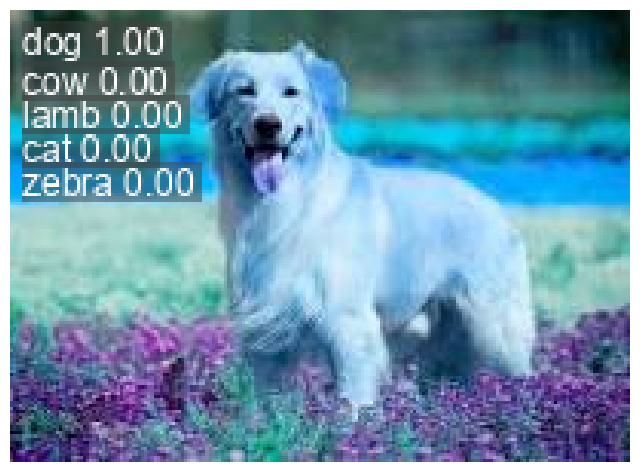

In [128]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

# model = YOLO("runs/classify/train3/weights/best.pt")

results = model.predict(source="input.jpg", conf=0.25)

annotated_img = results[0].plot()

plt.figure(figsize=(8,8))
plt.imshow(annotated_img)
plt.axis("off")
plt.show()





In [130]:
from ultralytics import YOLO
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import os

model = YOLO("runs/classify/train3/weights/best.pt")

test_folder = "dataset_yolo/test"
y_true = []
y_pred = []
class_names = sorted(os.listdir(test_folder))

for class_name in class_names:
    class_path = os.path.join(test_folder, class_name)
    for img_name in os.listdir(class_path):
        if img_name.endswith((".jpg", ".png", ".jpeg")):
            img_path = os.path.join(class_path, img_name)

            # Run prediction
            results = model.predict(img_path)

            # Get top-1 predicted class
            pred_index = results[0].probs.top1
            y_pred.append(class_names[pred_index])
            y_true.append(class_name)
cm = confusion_matrix(y_true, y_pred, labels=class_names)
print("Confusion Matrix:")
print(cm)

# Optional: detailed classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))




image 1/1 /content/dataset_yolo/test/cat/cat102.jpg: 256x256 cat 0.85, dog 0.14, lamb 0.01, zebra 0.00, cow 0.00, 36.0ms
Speed: 20.4ms preprocess, 36.0ms inference, 0.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 /content/dataset_yolo/test/cat/cat091.jpg: 256x256 cat 0.98, cow 0.01, dog 0.01, zebra 0.00, lamb 0.00, 68.5ms
Speed: 255.1ms preprocess, 68.5ms inference, 0.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 /content/dataset_yolo/test/cat/cat046.jpg: 256x256 cat 1.00, dog 0.00, zebra 0.00, cow 0.00, lamb 0.00, 28.0ms
Speed: 147.4ms preprocess, 28.0ms inference, 0.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 /content/dataset_yolo/test/cat/cat089.jpg: 256x256 cat 0.47, dog 0.36, lamb 0.12, zebra 0.04, cow 0.01, 27.8ms
Speed: 203.0ms preprocess, 27.8ms inference, 0.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 /content/dataset_yolo/test/cat/cat030.jpg: 256x256 cat 1.00, dog 0.00, lamb 0.00, cow 0.00, zebra 0.00, 30

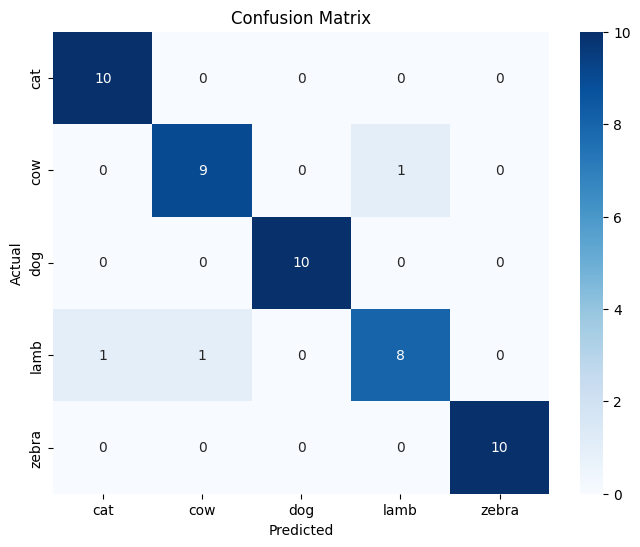

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
